In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [17]:
def change_rank(x):
    return (-1*(x-32))+1

In [2]:
pass_stats = pd.read_excel('../data/pass/sportsref_pass1_18.xls')
for x in range(1,12):
    c = pd.read_excel(f'../data/pass/sportsref_downloadp({x}).xls', skiprows=1)
    pass_stats = pd.concat([pass_stats, c], ignore_index = True, sort=False)

In [3]:
for x in range(1,12):
    c = pd.read_excel(f'../data/pass/sportsref_downloadp({x}).xls', skiprows=1)
    pass_stats = pd.concat([pass_stats, c], ignore_index = True, sort=False)
  

In [4]:
pass_stats = pass_stats.rename({'Unnamed: 7': 'Where'}, axis=1)

In [5]:
pass_stats1 = pass_stats[(pass_stats['Pos'] == 'QB') & (pass_stats['Att'] > 14)]


In [6]:
result = []
points_home = []
points_away = []
for x in pass_stats1.Result:
    result.append(x[0])
    reg1 = re.findall(r'\d*[^-]', x)
    points_home.append(reg1[2])
    points_away.append(reg1[3])

In [7]:
pass_stats1['Final'] = result
pass_stats1['PointsHome'] = points_home
pass_stats1['PointsAway'] = points_away

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
pass_stats2 = pass_stats1.drop(['Lg', 'Result'], axis=1)

In [9]:
pass_stats2['Where'].fillna('home',inplace=True)

In [10]:
dif_sta = {'TAM':6, 'GNB':21, 'NOR':26, 'KAN':31, 'BAL':18, 'WAS':15, 'NYJ':4, 'CIN':16, 'LAC':13, 'NWE':32, 'LAR':22,
           'MIN':29, 'IND':12, 'SEA':28, 'MIA':7, 'DEN':20, 'CAR':27, 'DAL':23, 'CHI':7, 'NYG':5, 'JAX':3, 'HOU':19,
           'OAK':9, 'PIT':30, 'ARI':17, 'ATL':24, 'BUF':10, 'CLE':1, 'PHI':25, 'DET':14, 'TEN':11, 'SFO':2}

In [11]:
pass_stats2.reset_index(inplace=True, drop=True)

In [12]:
stadium = [] 
for i, x in enumerate(pass_stats2.Where):
    if x == 'home':
        stadium.append(1)
    else:
        stadium.append(0)

In [13]:
pass_stats2['Where'] = stadium

In [16]:
pass_stats2.head()

,Rk,Player,Pos,Age,Date,Tm,Where,Opp,G#,Week,...,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,Final,PointsHome,PointsAway
0,1,Ryan Fitzpatrick,QB,35.289,2018-09-09,TAM,0,NOR,1,1,...,4,0,156.2,0,0,14.89,17.75,W,48,40
1,2,Aaron Rodgers,QB,34.281,2018-09-09,GNB,1,CHI,1,1,...,3,0,130.7,2,19,9.53,11.53,W,24,23
2,3,Drew Brees,QB,39.237,2018-09-09,NOR,1,TAM,1,1,...,3,0,129.5,1,7,9.76,11.09,L,40,48
3,4,Patrick Mahomes,QB,22.357,2018-09-09,KAN,0,LAC,1,1,...,4,0,127.5,1,0,9.48,12.44,W,38,28
4,5,Joe Flacco,QB,33.236,2018-09-09,BAL,1,BUF,1,1,...,3,0,121.7,1,0,6.94,8.71,W,47,3


In [20]:
dif_list = []
for i, x in enumerate(pass_stats2.Where):
    if x == 0:
        dif_list.append(dif_sta[pass_stats2.Opp[i]]+32)
    else:
        dif_list.append(change_rank(dif_sta[pass_stats2.Tm[i]]))


In [22]:
pass_stats2['Stadium_Diff'] = dif_list

In [24]:
pass_stats4 = pass_stats2.drop(['Tm', 'G#', 'Pos'], axis=1)

In [34]:
month_list = [x.month for x in pass_stats4.Date]


In [35]:
pass_stats4['month'] = month_list

In [37]:
pass_stats4['month'] = pass_stats4['month'].map({9:'September', 10:'October', 11:'November', 12:'December'})

In [38]:
pass_stats5 = pass_stats4.drop(['Date', 'Age'], axis=1)

In [64]:
pass6 = pass_stats5.set_index(['Player', 'Week'])

In [65]:
pass6.head()

,,Rk,Where,Opp,Day,Cmp,Att,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,Final,PointsHome,PointsAway,Stadium_Diff,month
Player,Week,,,,,,,,,,,,,,,,,,,,
Ryan Fitzpatrick,1,1,0,NOR,Sun,21,28,75.00,417,4,0,156.2,0,0,14.89,17.75,W,48,40,58,September
Aaron Rodgers,1,2,1,CHI,Sun,20,30,66.67,286,3,0,130.7,2,19,9.53,11.53,W,24,23,12,September
Drew Brees,1,3,1,TAM,Sun,37,45,82.22,439,3,0,129.5,1,7,9.76,11.09,L,40,48,7,September
Patrick Mahomes,1,4,0,LAC,Sun,15,27,55.56,256,4,0,127.5,1,0,9.48,12.44,W,38,28,45,September
Joe Flacco,1,5,1,BUF,Sun,25,34,73.53,236,3,0,121.7,1,0,6.94,8.71,W,47,3,15,September


In [66]:
pass6['PointsHome'] = pd.to_numeric(pass6.PointsHome, errors='coerce')

In [67]:
pass6['PointsAway'] = pd.to_numeric(pass6.PointsAway, errors='coerce')

In [68]:
pass6['Final'] = pass6.Final.map({'W':1, 'L':0, 'T':2})

In [69]:
dif_pass_def = {'TAM':7, 'GNB':21, 'NOR':4, 'KAN':2, 'BAL':28, 'WAS':18, 'NYJ':9, 'CIN':1, 'LAC':24, 'NWE':11, 'LAR':19,
           'MIN':30, 'IND':17, 'SEA':16, 'MIA':12, 'DEN':13, 'CAR':15, 'DAL':20, 'CHI':26, 'NYG':10, 'JAX':31, 'HOU':5,
           'OAK':14, 'PIT':23, 'ARI':29, 'ATL':6, 'BUF':1, 'CLE':8, 'PHI':3, 'DET':25, 'TEN':27, 'SFO':22}

In [70]:
dif_def = [dif_pass_def[x] for x in pass6['Opp']]

In [71]:
pass6['Opp'] = dif_def

In [72]:
pass7 = pd.get_dummies(pass6)

In [73]:
pass7.head()

,,Rk,Where,Opp,Cmp,Att,Cmp%,Yds,TD,Int,Rate,...,PointsAway,Stadium_Diff,Day_Mon,Day_Sat,Day_Sun,Day_Thu,month_December,month_November,month_October,month_September
Player,Week,,,,,,,,,,,,,,,,,,,,,
Ryan Fitzpatrick,1,1,0,4,21,28,75.00,417,4,0,156.2,...,40,58,0,0,1,0,0,0,0,1
Aaron Rodgers,1,2,1,26,20,30,66.67,286,3,0,130.7,...,23,12,0,0,1,0,0,0,0,1
Drew Brees,1,3,1,7,37,45,82.22,439,3,0,129.5,...,48,7,0,0,1,0,0,0,0,1
Patrick Mahomes,1,4,0,24,15,27,55.56,256,4,0,127.5,...,28,45,0,0,1,0,0,0,0,1
Joe Flacco,1,5,1,1,25,34,73.53,236,3,0,121.7,...,3,15,0,0,1,0,0,0,0,1


In [74]:
pass8=pass7.drop(['Yds.1', 'AY/A', 'Att', 'Cmp', 'Rate'], axis=1)

In [75]:
corr1 = pass8.corr()

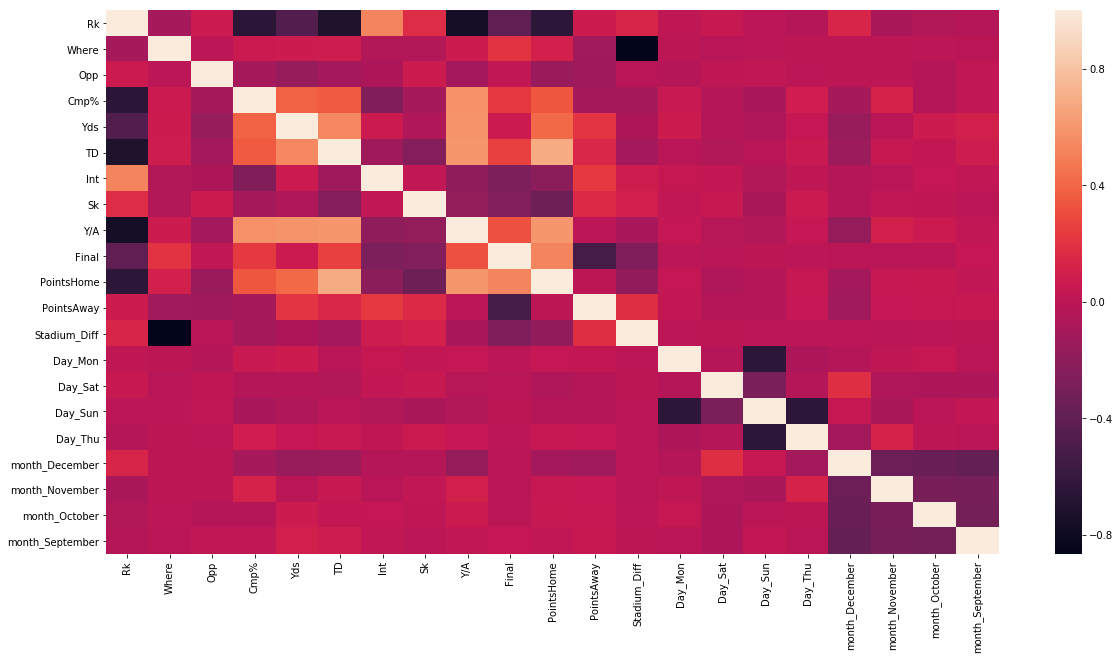

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)

In [77]:
corr1

,Rk,Where,Opp,Cmp%,Yds,TD,Int,Sk,Y/A,Final,...,PointsAway,Stadium_Diff,Day_Mon,Day_Sat,Day_Sun,Day_Thu,month_December,month_November,month_October,month_September
Rk,1.000000,-0.098501,0.064430,-0.646633,-0.471039,-0.712216,0.520419,0.176432,-0.766620,-0.401296,...,0.073255,0.140277,0.011716,0.046258,-0.002921,-0.029134,0.135753,-0.072742,-0.045974,-0.030002
Where,-0.098501,1.000000,-0.001987,0.064377,0.070465,0.081463,-0.048327,-0.043540,0.073872,0.200950,...,-0.115875,-0.864715,0.002566,-0.015604,0.001509,0.002566,0.002181,0.005144,0.000693,-0.007961
Opp,0.064430,-0.001987,1.000000,-0.094722,-0.161754,-0.107201,-0.068985,0.067738,-0.103509,0.022744,...,-0.127172,-0.016278,-0.030001,0.009873,0.021078,-0.004549,0.003581,0.005472,-0.027360,0.017660
Cmp%,-0.646633,0.064377,-0.094722,1.000000,0.383873,0.354840,-0.257080,-0.093616,0.576279,0.232356,...,-0.094685,-0.093542,0.057639,-0.030494,-0.091411,0.086454,-0.096335,0.119281,-0.035251,0.022501
Yds,-0.471039,0.070465,-0.161754,0.383873,1.000000,0.540127,0.062249,-0.054249,0.591053,0.062267,...,0.212842,-0.068443,0.068965,-0.040124,-0.058656,0.033081,-0.155814,-0.009215,0.073096,0.103843
TD,-0.712216,0.081463,-0.107201,0.354840,0.540127,1.000000,-0.122922,-0.240725,0.592727,0.255772,...,0.143287,-0.113668,-0.015381,-0.044190,-0.013738,0.055504,-0.142900,0.052567,0.025219,0.077362
Int,0.520419,-0.048327,-0.068985,-0.257080,0.062249,-0.122922,1.000000,0.020976,-0.191186,-0.274373,...,0.228773,0.077458,0.044243,0.027002,-0.047343,0.010431,-0.034609,-0.013871,0.031453,0.019573
Sk,0.176432,-0.043540,0.067738,-0.093616,-0.054249,-0.240725,0.020976,1.000000,-0.177471,-0.248544,...,0.159194,0.109167,0.022519,0.049496,-0.076516,0.063116,-0.028406,0.021664,0.013209,-0.003436
Y/A,-0.766620,0.073872,-0.103509,0.576279,0.591053,0.592727,-0.191186,-0.177471,1.000000,0.315661,...,0.000435,-0.085687,0.035558,-0.023009,-0.042068,0.034939,-0.166249,0.100463,0.060386,0.021788
Final,-0.401296,0.200950,0.022744,0.232356,0.062267,0.255772,-0.274373,-0.248544,0.315661,1.000000,...,-0.523345,-0.260673,-0.002490,-0.017342,0.009196,-0.002490,-0.010280,-0.014047,-0.009591,0.033889


In [104]:
pass8.columns

Index(['Rk', 'Where', 'Opp', 'Cmp%', 'Yds', 'TD', 'Int', 'Sk', 'Y/A', 'Final',
       'PointsHome', 'PointsAway', 'Stadium_Diff', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'month_December', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [162]:
pass9 = pass8.drop(['Cmp%', 'Yds', 'Int', 'Sk', 
                   'Y/A', 'PointsAway', 'Rk', 'TD', 'Final'], axis=1)

In [163]:
pass9.head()

,,Where,Opp,PointsHome,Stadium_Diff,Day_Mon,Day_Sat,Day_Sun,Day_Thu,month_December,month_November,month_October,month_September
Player,Week,,,,,,,,,,,,
Ryan Fitzpatrick,1,0,4,48,58,0,0,1,0,0,0,0,1
Aaron Rodgers,1,1,26,24,12,0,0,1,0,0,0,0,1
Drew Brees,1,1,7,40,7,0,0,1,0,0,0,0,1
Patrick Mahomes,1,0,24,38,45,0,0,1,0,0,0,0,1
Joe Flacco,1,1,1,47,15,0,0,1,0,0,0,0,1


In [122]:
from sklearn.model_selection import train_test_split

y = pass9.Final 
X = pass9.drop('Final', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logreg_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
from sklearn.metrics import confusion_matrix

y_pred_test = logreg_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred_test)
confusion

array([[33, 20,  0],
       [20, 30,  0],
       [ 0,  1,  0]])

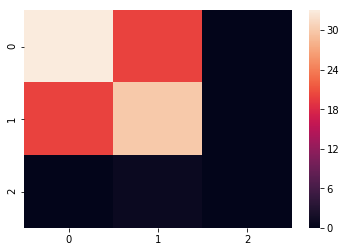

In [125]:
sns.heatmap(confusion)

In [113]:
y_pred_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [126]:
pass8.head()

,,Rk,Where,Opp,Cmp%,Yds,TD,Int,Sk,Y/A,Final,...,PointsAway,Stadium_Diff,Day_Mon,Day_Sat,Day_Sun,Day_Thu,month_December,month_November,month_October,month_September
Player,Week,,,,,,,,,,,,,,,,,,,,,
Ryan Fitzpatrick,1,1,0,4,75.00,417,4,0,0,14.89,1,...,40,58,0,0,1,0,0,0,0,1
Aaron Rodgers,1,2,1,26,66.67,286,3,0,2,9.53,1,...,23,12,0,0,1,0,0,0,0,1
Drew Brees,1,3,1,7,82.22,439,3,0,1,9.76,0,...,48,7,0,0,1,0,0,0,0,1
Patrick Mahomes,1,4,0,24,55.56,256,4,0,1,9.48,1,...,28,45,0,0,1,0,0,0,0,1
Joe Flacco,1,5,1,1,73.53,236,3,0,1,6.94,1,...,3,15,0,0,1,0,0,0,0,1


In [128]:
from sklearn.linear_model import LinearRegression

In [187]:
linreg = LinearRegression()
y = pass9.PointsHome
X = pass9.drop('PointsHome', axis=1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [191]:
pred_points = linreg.fit(X_train, y_train).predict(X_test)

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score

precision = precision_score(y_test, y_pred_test, average=None)
recall = recall_score(y_test, y_pred_test, average=None)
f1_score = f1_score(y_test, y_pred_test, average=None)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [192]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred_points)

In [193]:
rmse = mse**(1/2)

In [194]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred_points)

In [195]:
print(mae, rmse)

7.492115159207012 9.799744020177346


In [301]:
w1 = pd.read_excel('../data/pass/sportsref_downloadpred(1).xls', skiprows=1)

In [302]:
w1 = w1[(w1.Pos == 'QB') & (w1.Att >= 10)]

In [206]:
w1.drop(['Rk', 'Tm', 'Age', 'Pos', 'G#', 'Week', 'QBrec', 'Com', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 
         'Int%', 'Lng', 'Y/A', 'AY/Y', 'Y/C', 'Y/G', '')

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%
0,1,Kyler Murray,ARI,22,QB,1,1,0-0-1,29,54,...,5.6,10.6,308,75.2,NaN,5,33,4.66,4.58,8.5
1,2,Andy Dalton,CIN,32,QB,1,1,0-1-0,35,51,...,9.0,11.9,418,106.5,NaN,5,23,7.05,7.77,8.9
2,3,Ben Roethlisberger,PIT,37,QB,1,1,0-1-0,27,47,...,4.9,10.2,276,65.6,NaN,1,0,5.75,4.81,2.1
3,4,Matt Ryan,ATL,34,QB,1,1,0-1-0,33,46,...,5.5,9.2,304,85.8,NaN,4,32,5.44,4.44,8.0
4,5,Matthew Stafford,DET,31,QB,1,1,0-0-1,27,45,...,9.9,14.3,385,110.0,NaN,3,24,7.52,8.77,6.3
5,6,Mitchell Trubisky,CHI,25,QB,1,1,0-1-0,26,45,...,4.1,8.8,228,62.1,NaN,5,20,4.16,3.26,10.0
6,7,Case Keenum,WAS,31,QB,1,1,0-1-0,30,44,...,10.0,12.7,380,117.6,NaN,1,10,8.22,9.56,2.2
7,8,Eli Manning,NYG,38,QB,1,1,0-1-0,30,44,...,7.4,10.2,306,95.5,NaN,1,4,6.71,7.16,2.2
8,9,Drew Brees,NOR,40,QB,1,1,1-0-0,32,43,...,8.5,11.6,370,105.8,NaN,1,8,8.23,8.11,2.3
9,10,Sam Darnold,NYJ,22,QB,1,1,0-1-0,28,41,...,4.8,6.3,175,84.9,NaN,4,20,3.44,3.89,8.9


In [291]:
def clean_stats_qb(run_stats, dic_def):
    run_stats = run_stats.rename({'Unnamed: 7': 'Where'}, axis=1) 
    result = []
    points_home = []
    points_away = []
    for x in run_stats.Result:
        result.append(x[0])
        reg1 = re.findall(r'\d*[^-]', x)
        points_home.append(reg1[2])
        points_away.append(reg1[3])
    run_stats['Result'] = result
    run_stats['Points_Team'] = points_home
    run_stats['Points_Opp'] = points_away
    run_stats.Where.fillna('home', inplace=True)
    run_stats2 = run_stats.reset_index(drop=True)
    stadium = [] 
    for i, x in enumerate(run_stats2.Where):
        if x == 'home':
            stadium.append(1)
        else:
            stadium.append(0)
    run_stats2['Where'] = stadium
    dif_list = []
    for i, x in enumerate(run_stats2.Where):
        if x == 0:
            dif_list.append(dif_sta[run_stats2.Opp[i]]+32)
        else:
            dif_list.append(change_rank(dif_sta[run_stats2.Tm[i]]))
    run_stats2['Stad_Diff'] = dif_list
    run_stats3 = run_stats2.drop(['Lg', 'Tm', 'G#', 'Rk', 'Pos', 'Age', 'Y/A', 'Yds.1', 'Rate', 'Cmp', 'AY/A'], axis=1)
    run_stats3['Date'] = [x.month for x in run_stats3.Date]
    run_stats3['Date'] = run_stats3['Date'].map({9:'September', 10:'October', 11:'November', 12:'December'})
    run_stats3['Points_Team'] = pd.to_numeric(run_stats3.Points_Team, errors='coerce')
    run_stats3['Points_Opp'] = pd.to_numeric(run_stats3.Points_Opp, errors='coerce')
    run_stats3['Result'] = run_stats3.Result.map({'W':1, 'L':0, 'T':2})
    run_stats3['Opp'] = run_stats3['Opp'].map(dic_def)
    run_stats4 = run_stats3.set_index(['Week', 'Player'])
    run_stats5 = pd.get_dummies(run_stats4)
    return run_stats5

In [277]:
w1 = clean_stats_qb19_w4(w1, dif_pass_def)

Where  Opp  Result  Att   Cmp%  Yds  TD  Int  Sk  \
Week Player                                                              
1    Lamar Jackson        0   12       1   20  85.00  324   5    0   1   
     Dak Prescott         1   10       1   32  78.13  405   4    0   0   
     Patrick Mahomes      0   31       1   33  75.76  378   3    0   0   
     Kirk Cousins         1    6       1   10  80.00   98   1    0   1   
     Russell Wilson       1    1       1   20  70.00  196   2    0   4   

                      Points_Team  Points_Opp  Stad_Diff  Date_September  \
Week Player                                                                
1    Lamar Jackson             59          10         39               1   
     Dak Prescott              35          17         10               1   
     Patrick Mahomes           40          26         35               1   
     Kirk Cousins              28          12          4               1   
     Russell Wilson            21          20          5               1   

                      Day_Mon  Day_Sun  Day_Thu  Date_October  Date_November  \
Week Player                                                                    
1    Lamar Jackson          0        1        0             0              0   
     Dak Prescott           0        1        0             0              0   
     Patrick Mahomes        0        1        0             0              0   
     Kirk Cousins           0        1        0             0              0   
     Russell Wilson         0        1        0             0              0   

                      Date_December  Day_Sat  
Week Player                                   
1    Lamar Jackson                0        0  
     Dak Prescott                 0        0  
     Patrick Mahomes              0        0  
     Kirk Cousins                 0        0  
     Russell Wilson               0        0

In [270]:
w1['Date_October'] = [0 for x in range(len(w1))]
w1['Date_November'] = [0 for x in range(len(w1))]
w1['Date_December'] = [0 for x in range(len(w1))]
w1['Day_Sat'] = [0 for x in range(len(w1))]

In [232]:
passw1 = w1.drop(['Cmp%', 'Yds', 'Int', 'Sk', 'Y/A', 'Points_Opp', 'TD', 'Result', 'Cmp', 'Att', 
                  'Int','Rate', 'Sk', 'Yds.1', 'AY/A', 'Points_Team'], axis=1)

In [244]:
passw1 = passw1[cols]

In [235]:
cols = ['Where', 'Opp', 'Stad_Diff', 'Day_Mon', 'Day_Sat', 'Day_Sun', 'Day_Thu', 'Date_December', 
       'Date_November', 'Date_October', 'Date_September']

In [224]:
X_train.head()

,,Where,Opp,Stadium_Diff,Day_Mon,Day_Sat,Day_Sun,Day_Thu,month_December,month_November,month_October,month_September
Player,Week,,,,,,,,,,,
Dak Prescott,9,1,27,10,1,0,0,0,0,1,0,0
Jeff Driskel,17,0,23,62,0,0,1,0,1,0,0,0
Lamar Jackson,15,1,7,15,0,0,1,0,1,0,0,0
Matthew Stafford,5,1,21,19,0,0,1,0,0,0,1,0
Drew Brees,3,0,6,56,0,0,1,0,0,0,0,1


In [237]:
pred19 = linreg.predict(passw1)

In [238]:
maew1 = mean_absolute_error(w1.Points_Team, pred19)

In [239]:
maew1

8.078189327789758

In [271]:
corrw1 = w1.corr()

In [272]:
corrw1

,Where,Opp,Result,Att,Cmp%,Yds,TD,Int,Sk,Points_Team,Points_Opp,Stad_Diff,Date_September,Day_Mon,Day_Sun,Day_Thu,Date_October,Date_November,Date_December,Day_Sat
Where,1.000000,-0.071470,0.051640,-0.093272,0.088733,-0.140444,-0.132920,0.183432,0.017506,-0.087559,0.087559,-0.827869,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
Opp,-0.071470,1.000000,0.078208,0.337128,-0.347801,0.167038,-0.067585,0.211133,0.165929,-0.203007,0.190045,0.098398,NaN,-0.268846,0.088830,0.224079,NaN,NaN,NaN,NaN
Result,0.051640,0.078208,1.000000,-0.093507,0.015438,0.172360,0.393993,-0.270911,-0.170859,0.498496,-0.423891,-0.355743,NaN,-0.058554,0.074421,-0.040000,NaN,NaN,NaN,NaN
Att,-0.093272,0.337128,-0.093507,1.000000,-0.452821,0.499685,-0.174680,0.239172,0.244193,-0.382217,0.217897,0.327217,NaN,-0.098466,0.042746,0.065604,NaN,NaN,NaN,NaN
Cmp%,0.088733,-0.347801,0.015438,-0.452821,1.000000,0.197501,0.404881,-0.319754,-0.435188,0.466703,-0.205604,-0.173985,NaN,0.215142,-0.024094,-0.255090,NaN,NaN,NaN,NaN
Yds,-0.140444,0.167038,0.172360,0.499685,0.197501,1.000000,0.591034,-0.169793,-0.108419,0.298765,0.040001,0.128054,NaN,0.085236,0.047420,-0.192916,NaN,NaN,NaN,NaN
TD,-0.132920,-0.067585,0.393993,-0.174680,0.404881,0.591034,1.000000,-0.365728,-0.143804,0.775694,-0.183304,-0.058688,NaN,-0.030144,0.208586,-0.295151,NaN,NaN,NaN,NaN
Int,0.183432,0.211133,-0.270911,0.239172,-0.319754,-0.169793,-0.365728,1.000000,0.249831,-0.373420,0.403936,0.075136,NaN,-0.069331,0.088118,-0.047362,NaN,NaN,NaN,NaN
Sk,0.017506,0.165929,-0.170859,0.244193,-0.435188,-0.108419,-0.143804,0.249831,1.000000,-0.356763,-0.021076,0.136430,NaN,0.006617,-0.232668,0.366126,NaN,NaN,NaN,NaN
Points_Team,-0.087559,-0.203007,0.498496,-0.382217,0.466703,0.298765,0.775694,-0.373420,-0.356763,1.000000,-0.284619,-0.229397,NaN,0.008274,0.241855,-0.401284,NaN,NaN,NaN,NaN


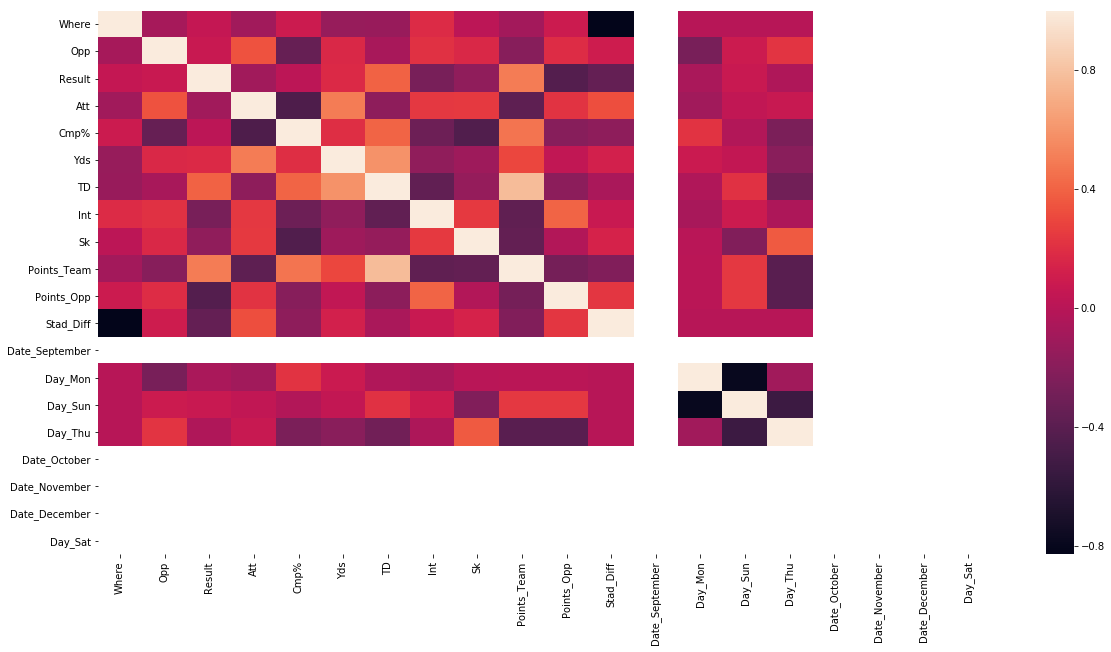

In [273]:
plt.figure(figsize=(20,10))
sns.heatmap(corrw1, 
        xticklabels=corrw1.columns,
        yticklabels=corrw1.columns)

In [305]:
def clean_stats_qb19_w4(df1, run_stats, dic_def):
    run_stats = run_stats.rename({'Unnamed: 7': 'Where'}, axis=1) 
    result = []
    points_home = []
    points_away = []
    for x in run_stats.Result:
        result.append(x[0])
        reg1 = re.findall(r'\d*[^-]', x)
        points_home.append(reg1[2])
        points_away.append(reg1[3])
    run_stats['Result'] = result
    run_stats['Points_Team'] = points_home
    run_stats['Points_Opp'] = points_away
    run_stats.Where.fillna('home', inplace=True)
    run_stats2 = run_stats.reset_index(drop=True)
    stadium = [] 
    for i, x in enumerate(run_stats2.Where):
        if x == 'home':
            stadium.append(1)
        else:
            stadium.append(0)
    run_stats2['Where'] = stadium
    dif_list = []
    for i, x in enumerate(run_stats2.Where):
        if x == 0:
            dif_list.append(dif_sta[run_stats2.Opp[i]]+32)
        else:
            dif_list.append(change_rank(dif_sta[run_stats2.Tm[i]]))
    run_stats2['Stad_Diff'] = dif_list
    run_stats3 = run_stats2.drop(['Lg', 'Tm', 'G#', 'Rk', 'Pos', 'Age', 'Y/A', 'Yds.1', 'Rate', 'Cmp', 'AY/A'], axis=1)
    run_stats3['Date'] = [x.month for x in run_stats3.Date]
    run_stats3['Date'] = run_stats3['Date'].map({9:'September', 10:'October', 11:'November', 12:'December'})
    run_stats3['Points_Team'] = pd.to_numeric(run_stats3.Points_Team, errors='coerce')
    run_stats3['Points_Opp'] = pd.to_numeric(run_stats3.Points_Opp, errors='coerce')
    run_stats3['Result'] = run_stats3.Result.map({'W':1, 'L':0, 'T':2})
    run_stats3['Opp'] = run_stats3['Opp'].map(dic_def)
    run_stats4 = run_stats3.set_index(['Week', 'Player'])
    run_stats5 = pd.get_dummies(run_stats4)
    run_stats5['Date_October'] = [0 for x in range(len(w1))]
    run_stats5['Date_November'] = [0 for x in range(len(w1))]
    run_stats5['Date_December'] = [0 for x in range(len(w1))]
    run_stats5['Day_Sat'] = [0 for x in range(len(w1))]
    run_stats5 = run_stats5[list(df1.columns)]
    run = pd.concat([df1, run_stats5], sort=False)
    return run

In [257]:
corrw1['Points_Team']

Where            -0.087559
Opp              -0.203007
Result            0.498496
Cmp              -0.201244
Att              -0.382217
Cmp%              0.466703
Yds               0.298765
TD                0.775694
Int              -0.373420
Sk               -0.356763
AY/A              0.758124
Points_Team       1.000000
Points_Opp       -0.284619
Stad_Diff        -0.229397
Date_September         NaN
Day_Mon           0.008274
Day_Sun           0.241855
Day_Thu          -0.401284
Date_October           NaN
Date_November          NaN
Date_December          NaN
Day_Sat                NaN
Name: Points_Team, dtype: float64

In [280]:
w1.columns

Index(['Where', 'Opp', 'Result', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Sk',
       'Points_Team', 'Points_Opp', 'Stad_Diff', 'Date_September', 'Day_Mon',
       'Day_Sun', 'Day_Thu', 'Date_October', 'Date_November', 'Date_December',
       'Day_Sat'],
      dtype='object')

In [289]:
pass8.columns

Index(['Rk', 'Where', 'Opp', 'Cmp%', 'Yds', 'TD', 'Int', 'Sk', 'Y/A', 'Final',
       'PointsHome', 'PointsAway', 'Stadium_Diff', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'month_December', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [281]:
X = w1.drop('Points_Team', axis=1)
y = w1.Points_Team

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [284]:
linreg = LinearRegression()
fitted = linreg.fit(X_train, y_train)

In [285]:
pred = fitted.predict(X_test)

In [286]:
mae = mean_absolute_error(y_test, pred)

In [287]:
mae

5.568482967841074

In [290]:
pass_stats.

Index(['Rk', 'Player', 'Pos', 'Age', 'Date', 'Lg', 'Tm', 'Where', 'Opp',
       'Result', 'G#', 'Week', 'Day', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int',
       'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A'],
      dtype='object')

In [292]:
pass_stats = pd.read_excel('../data/pass/sportsref_pass1_18.xls')
for x in range(1,12):
    c = pd.read_excel(f'../data/pass/sportsref_downloadp({x}).xls', skiprows=1)
    pass_stats = pd.concat([pass_stats, c], ignore_index = True, sort=False)

In [294]:
pass_stats1 = clean_stats_qb(pass_stats, dif_pass_def)

In [299]:
list(pass_stats1.columns)

['Where',
 'Opp',
 'Result',
 'Att',
 'Cmp%',
 'Yds',
 'TD',
 'Int',
 'Sk',
 'Points_Team',
 'Points_Opp',
 'Stad_Diff',
 'Date_December',
 'Date_November',
 'Date_October',
 'Date_September',
 'Day_Mon',
 'Day_Sat',
 'Day_Sun',
 'Day_Thu']

In [298]:
w1.columns

Index(['Where', 'Opp', 'Result', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Sk',
       'Points_Team', 'Points_Opp', 'Stad_Diff', 'Date_September', 'Day_Mon',
       'Day_Sun', 'Day_Thu', 'Date_October', 'Date_November', 'Date_December',
       'Day_Sat'],
      dtype='object')

In [306]:
pass_stats02 = clean_stats_qb19_w4(pass_stats1, w1, dif_pass_def)

In [308]:
pass_stats02.tail()

Where  Opp  Result  Att   Cmp%  Yds  TD  Int  Sk  \
Week Player                                                                 
1    Ryan Fitzpatrick        1   28       0   29  48.28  185   1    1   2   
     Ben Roethlisberger      0   11       0   47  57.45  276   0    1   1   
     Baker Mayfield          1   27       0   38  65.79  285   1    3   5   
     Mitchell Trubisky       1   21       0   45  57.78  228   0    1   5   
     Jameis Winston          1   22       0   36  55.56  194   1    3   3   

                         Points_Team  Points_Opp  Stad_Diff  Date_December  \
Week Player                                                                  
1    Ryan Fitzpatrick             10          59         26              0   
     Ben Roethlisberger            3          33         64              0   
     Baker Mayfield               13          43         32              0   
     Mitchell Trubisky             3          10         26              0   
     Jameis Winston               17          31         27              0   

                         Date_November  Date_October  Date_September  Day_Mon  \
Week Player                                                                     
1    Ryan Fitzpatrick                0             0               1        0   
     Ben Roethlisberger              0             0               1        0   
     Baker Mayfield                  0             0               1        0   
     Mitchell Trubisky               0             0               1        0   
     Jameis Winston                  0             0               1        0   

                         Day_Sat  Day_Sun  Day_Thu  
Week Player                                         
1    Ryan Fitzpatrick          0        1        0  
     Ben Roethlisberger        0        1        0  
     Baker Mayfield            0        1        0  
     Mitchell Trubisky         0        0        1  
     Jameis Winston            0        1        0

In [309]:
pass_stats02.shape

(654, 20)

In [310]:
pass_stats1.shape

(622, 20)